In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Introduction
print("### MRI and Alzheimer's Analysis ###")
print("\nThis notebook aims to explore and analyze magnetic resonance imaging (MRI) data of individuals in relation to Alzheimer's disease. The data was obtained from the Open Access Series of Imaging Studies (OASIS), a project that provides brain MRI datasets to the scientific community.")
print("\nThe dataset includes both cross-sectional and longitudinal MRI data, spanning a wide range of ages and health states of individuals.")
print("\nWe will perform the following steps in this notebook:")
print("1. Data preprocessing.")
print("2. Exploratory analysis to understand the distribution of features.")
print("3. Building machine learning models for tasks related to Alzheimer's, such as diagnosis and disease progression prediction.")
print("4. Evaluating model performance and interpreting the results.")
print("\nLet's start by exploring the data and preparing it for analysis.")


### MRI and Alzheimer's Analysis ###

This notebook aims to explore and analyze magnetic resonance imaging (MRI) data of individuals in relation to Alzheimer's disease. The data was obtained from the Open Access Series of Imaging Studies (OASIS), a project that provides brain MRI datasets to the scientific community.

The dataset includes both cross-sectional and longitudinal MRI data, spanning a wide range of ages and health states of individuals.

We will perform the following steps in this notebook:
1. Data preprocessing.
2. Exploratory analysis to understand the distribution of features.
3. Building machine learning models for tasks related to Alzheimer's, such as diagnosis and disease progression prediction.
4. Evaluating model performance and interpreting the results.

Let's start by exploring the data and preparing it for analysis.


In [3]:
# Import necessary libraries for data analysis
import pandas as pd

# Load the data from the .csv file
data = pd.read_csv('oasis_cross-sectional.csv')

# View the first few rows of the dataset to understand its structure
print(data.head())

# Check basic information about the dataset, such as the number of rows, columns, data types, and missing values
print(data.info())

# Descriptive statistics of numeric variables
print(data.describe())

# Check for missing values
print(data.isnull().sum())


              ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0  OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1  OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2  OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3  OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4  OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   

   Delay  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8

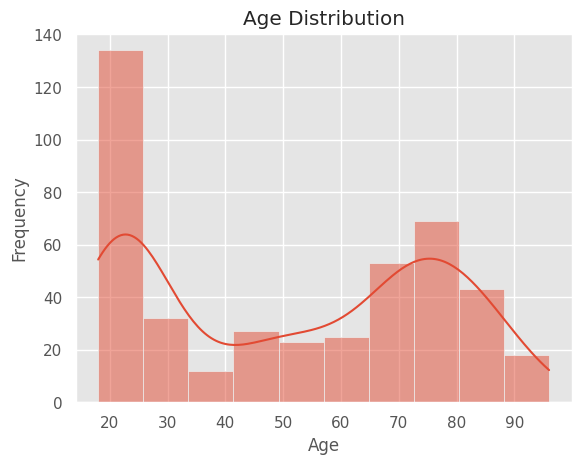

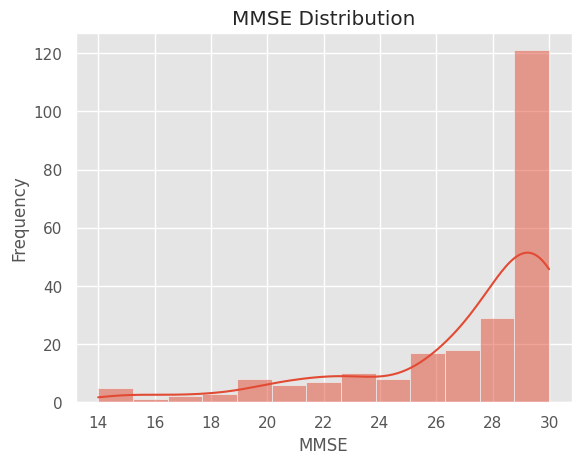

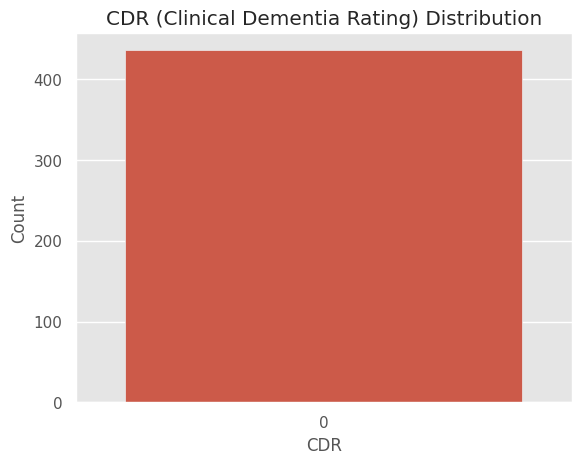

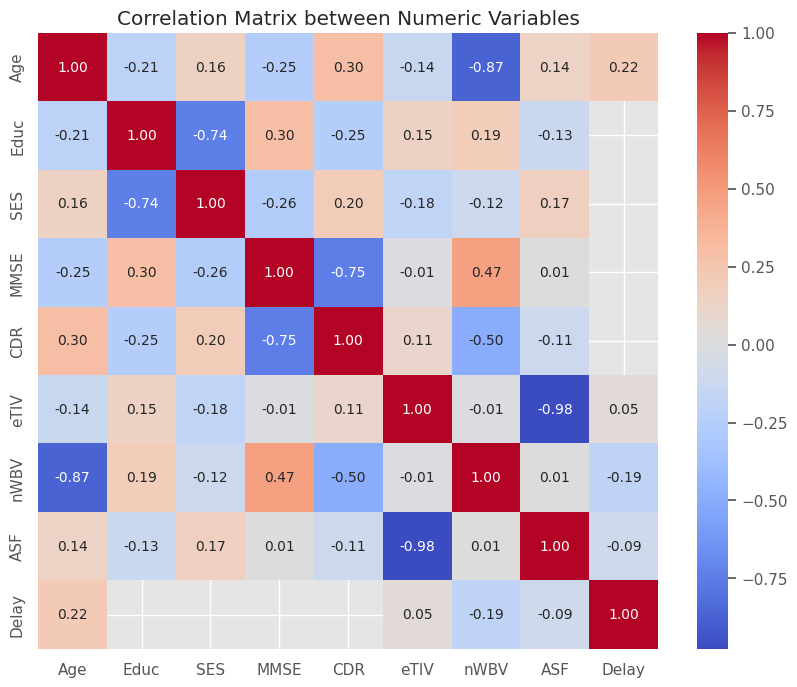

              ID Hand       Age  Educ       SES    MMSE  CDR      eTIV  \
0  OAS1_0001_MR1    R  0.717949   2.0  0.500000  0.9375  0.0  0.254315   
1  OAS1_0002_MR1    R  0.474359   4.0  0.000000  0.9375  0.0  0.027618   
2  OAS1_0003_MR1    R  0.705128   4.0  0.500000  0.8125  0.5  0.380898   
3  OAS1_0004_MR1    R  0.128205   NaN  0.372685     NaN  NaN  0.535098   
4  OAS1_0005_MR1    R  0.000000   NaN  0.372685     NaN  NaN  0.706559   

       nWBV       ASF  Delay  M/F_M  
0  0.397590  0.623167    NaN      0  
1  0.666667  0.953079    NaN      0  
2  0.257028  0.478006    NaN      0  
3  0.638554  0.328446    NaN      1  
4  0.819277  0.189150    NaN      1  


In [4]:
# Initial data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization of age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Visualization of MMSE (Mini-Mental State Examination) distribution
sns.histplot(data['MMSE'], kde=True)
plt.title('MMSE Distribution')
plt.xlabel('MMSE')
plt.ylabel('Frequency')
plt.show()

# Checking the distribution of diagnosis classes (CDR)
sns.countplot(data['CDR'])
plt.title('CDR (Clinical Dementia Rating) Distribution')
plt.xlabel('CDR')
plt.ylabel('Count')
plt.show()

# Correlation between numeric variables
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix between Numeric Variables')
plt.show()

# Additional preprocessing (handling missing values, encoding categorical variables, normalization, etc.)

# Example of handling missing values, filling with the mean
data['SES'].fillna(data['SES'].mean(), inplace=True)

# Encoding categorical variables (e.g., gender)
data = pd.get_dummies(data, columns=['M/F'], drop_first=True)

# Normalization of numeric variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_features = ['Age', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Checking the data after preprocessing
print(data.head())

# Splitting the data into training and testing sets (if applicable)
